In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data=pd.read_csv("bank-full.csv",sep=";")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
data.shape

(45211, 17)

In [4]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [8]:
unknown_count=(data["job"]=="unknown").sum()
#to replace unknown values with mode value because there is a large number of unknown values,if i will replace it with mode value,it willintroduce a bias in the study.leave it as it is.

In [9]:
data.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [10]:
unknown_count=(data["education"]=="unknown").sum()

In [11]:
data.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [12]:
unknown_count=(data["contact"]=="unknown").sum()

In [13]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
data.duplicated().sum()

0

<Axes: xlabel='age', ylabel='Count'>

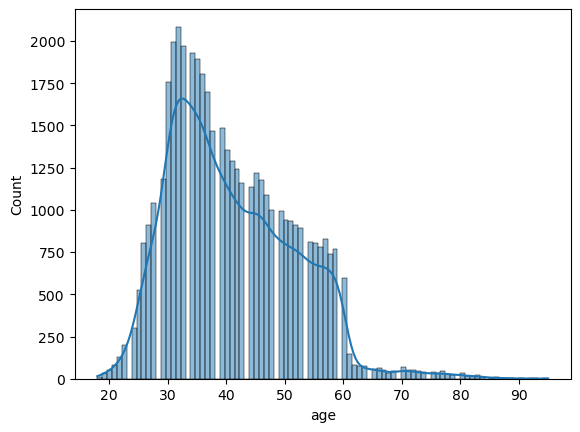

In [15]:
sns.histplot(x = data['age'],kde = True)

<Axes: xlabel='balance', ylabel='Count'>

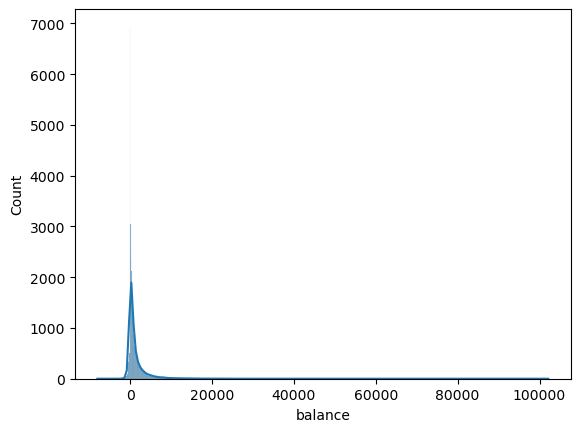

In [16]:
sns.histplot(x = data['balance'],kde = True)

<Axes: xlabel='day', ylabel='Count'>

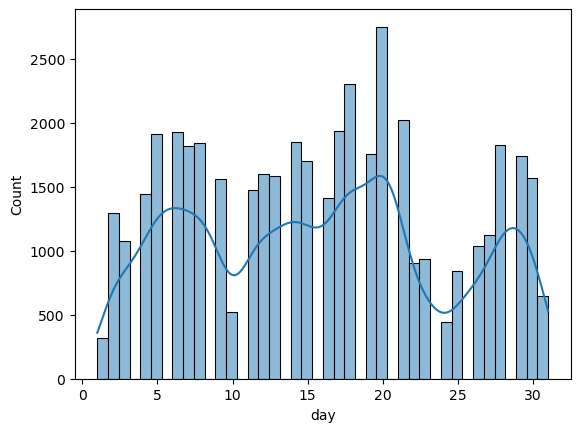

In [17]:
sns.histplot(x = data['day'],kde = True)

<Axes: >

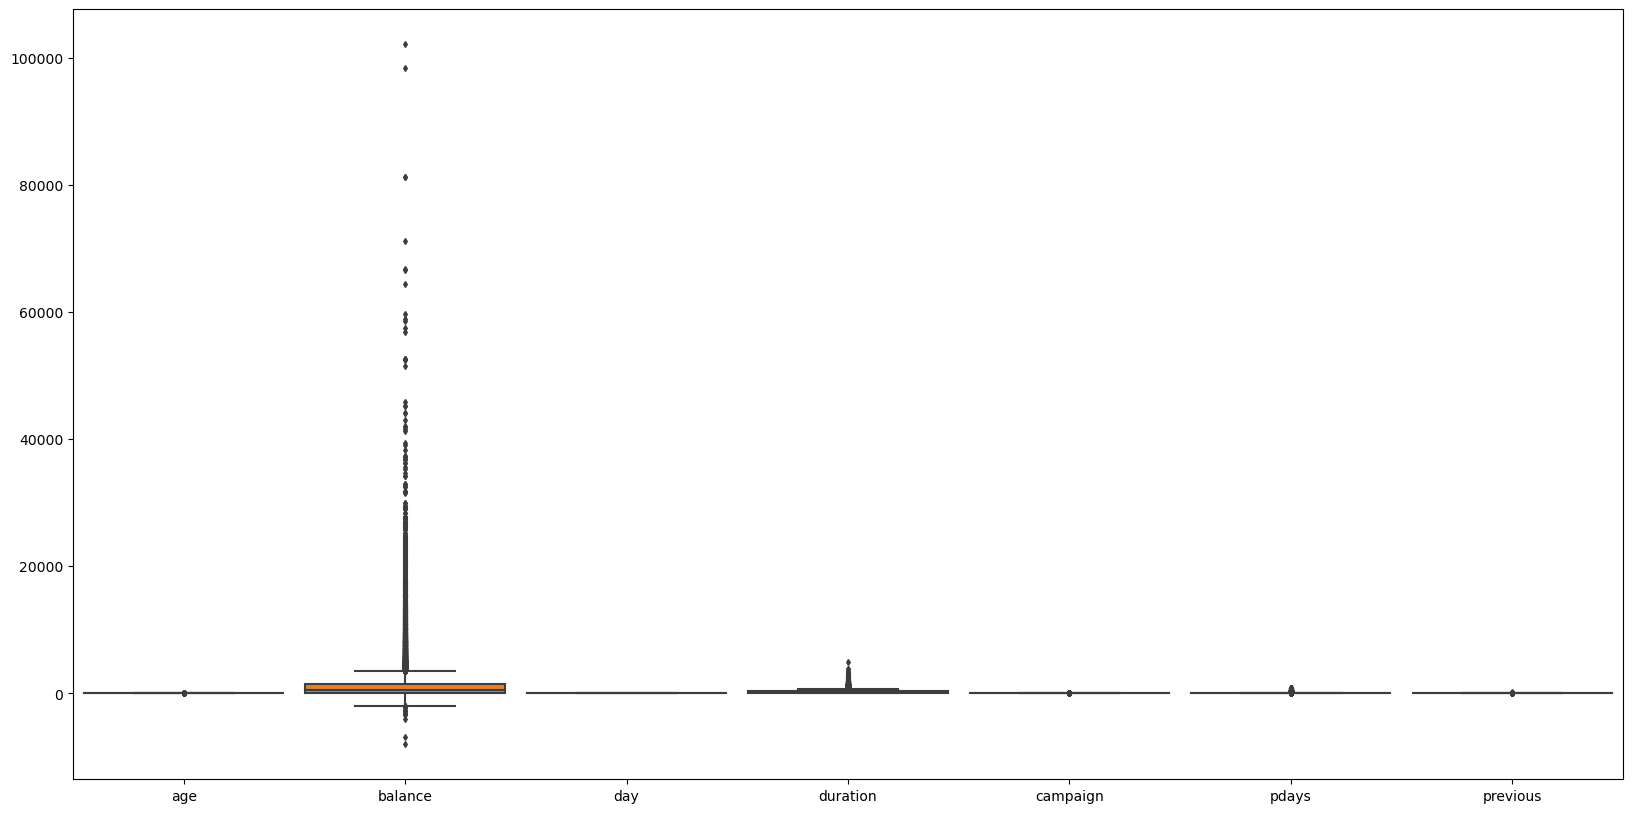

In [18]:
fig,ax = plt.subplots(figsize = (20,10))
sns.boxplot(data = data,width = 0.9,fliersize = 3)     

In [19]:
zeros_sum = (data == 0).sum()
print(zeros_sum)

age              0
job              0
marital          0
education        0
default          0
balance       3514
housing          0
loan             0
contact          0
day              0
month            0
duration         3
campaign         0
pdays            0
previous     36954
poutcome         0
y                0
dtype: int64


In [20]:
x=data.drop(columns=["y"])
y=data["y"]

In [21]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [22]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [23]:
x = data[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']]
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [24]:
x = pd.get_dummies(x,columns=['job','marital','education','default','housing','loan','contact','month','poutcome'])
x

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [25]:
columns_to_scale = ['age','balance','day','duration','campaign','pdays','previous']
scaler = StandardScaler()
x[columns_to_scale] = scaler.fit_transform(x[columns_to_scale])
x

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [26]:
y = data[['y']]
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [27]:
y = pd.get_dummies(y,columns=['y'])
y

,y_no,y_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
45206,0,1
45207,0,1
45208,0,1
45209,1,0


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=20)

In [29]:
x_train

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
32154,-1.124080,1.424010,-0.096898,0.694445,-0.569351,2.235169,0.182198,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22011,-0.841558,-0.447419,0.503892,-0.645231,0.399020,-0.411453,-0.251940,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17908,0.382703,-0.052968,1.705471,1.529316,-0.246560,-0.411453,-0.251940,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7298,0.947747,-0.583063,1.585313,0.282834,0.399020,-0.411453,-0.251940,0,1,0,...,0,0,1,0,0,0,0,0,0,1
31790,1.795313,3.506623,-0.938003,-0.086062,-0.569351,-0.411453,-0.251940,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31962,-0.935732,0.014362,-0.337213,3.234005,-0.246560,-0.411453,-0.251940,0,1,0,...,0,0,0,0,0,0,0,0,0,1
23452,1.701139,0.073152,1.465155,-0.649114,0.721811,-0.411453,-0.251940,0,0,0,...,0,0,0,0,0,0,0,0,0,1
23775,-0.182341,-0.453003,1.465155,2.523394,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,0,0,0,0,0,0,0,1
37135,-0.841558,-0.672070,-0.337213,-0.959764,1.690181,2.584723,1.050473,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [30]:
x_test

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
14458,-0.841558,-0.310133,-0.217055,-0.466608,0.076230,-0.411453,-0.251940,0,0,0,...,0,0,0,0,0,0,0,0,0,1
42532,-0.841558,-0.404394,0.624050,0.247886,-0.569351,1.486125,0.182198,1,0,0,...,0,0,0,0,0,0,0,0,1,0
15048,-1.029906,-0.025050,0.143418,1.109939,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,0,0,0,0,0,0,0,1
40121,-1.971646,-0.337065,-1.298476,-0.486023,-0.569351,-0.411453,-0.251940,1,0,0,...,1,0,0,0,0,0,0,0,0,1
27812,-1.218254,-0.439865,1.465155,-0.404478,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7731,-1.124080,-0.592917,1.705471,-0.078296,0.076230,-0.411453,-0.251940,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7242,1.795313,-0.447419,1.585313,3.684446,-0.569351,-0.411453,-0.251940,0,1,0,...,0,0,1,0,0,0,0,0,0,1
7339,-0.464863,1.058460,1.585313,0.205172,0.076230,-0.411453,-0.251940,0,0,0,...,0,0,1,0,0,0,0,0,0,1
22218,1.136095,-0.412934,0.624050,-0.715127,-0.246560,-0.411453,-0.251940,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
y_train

,y_no,y_yes
32154,1,0
22011,1,0
17908,1,0
7298,1,0
31790,0,1
...,...,...
31962,0,1
23452,1,0
23775,0,1
37135,1,0


In [32]:
y_test

,y_no,y_yes
14458,1,0
42532,0,1
15048,1,0
40121,1,0
27812,1,0
...,...,...
7731,1,0
7242,0,1
7339,1,0
22218,1,0


In [34]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

DecisionTreeClassifier_train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Training Accuracy: {DecisionTreeClassifier_train_accuracy}')

DecisionTreeClassifier_test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Testing Accuracy: {DecisionTreeClassifier_test_accuracy}')

print("\nClassification Report (Training Data):")
print(classification_report(y_train, train_predictions))

print("\nClassification Report (Testing Data):")
print(classification_report(y_test, test_predictions))

print("DecisionTreeClassifier:")
print(f'Training Accuracy: {DecisionTreeClassifier_train_accuracy}')
print(f'Testing Accuracy: {DecisionTreeClassifier_test_accuracy}\n')

Training Accuracy: 1.0
Testing Accuracy: 0.8732637352915156

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19930
           1       1.00      1.00      1.00      2675

   micro avg       1.00      1.00      1.00     22605
   macro avg       1.00      1.00      1.00     22605
weighted avg       1.00      1.00      1.00     22605
 samples avg       1.00      1.00      1.00     22605


Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     19992
           1       0.45      0.47      0.46      2614

   micro avg       0.87      0.87      0.87     22606
   macro avg       0.69      0.70      0.70     22606
weighted avg       0.88      0.87      0.87     22606
 samples avg       0.87      0.87      0.87     22606

DecisionTreeClassifier:
Training Accuracy: 1.0
Testing Accuracy: 0.8732637352915156

